## Initialize connection to data

In [1]:
import pandas as pd
column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']) #according to https://github.com/Wahch/projetIDS/blob/main/ProjetIDS.ipynb
data = pd.read_csv("KDDTrain+.txt", names=column_names)
data
#mask = data['State'].isnull()
#data[mask]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


## Exploring the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [12]:
data.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


This selects all data related to attacks

In [3]:
attacks = (data['attack'] != 'normal')
attack_data = data[attacks]
attack_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,19
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,tcp,private,S0,0,0,0,0,0,0,...,0.02,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
125964,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
125966,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune,21
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune,20


This is data related to non-malicious network activity

In [4]:
normal = (data['attack'] == 'normal')
normal_data = data[normal]
normal_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
12,0,tcp,http,SF,287,2251,0,0,0,0,...,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,0,tcp,smtp,SF,2233,365,0,0,0,0,...,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,normal,19
125967,0,tcp,http,SF,359,375,0,0,0,0,...,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,normal,18
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In order to get a better understanding of what needs to happen, we need to consider what data to map. In the code directly below, I am sorting the data out into different variables to use for later so I can better understand how to use it.

In [3]:
trialdata = data.select_dtypes(include=['object'])
simpleattack = (data['attack'] != 'normal')
simpleconn = (data['attack'] == 'normal')
attack_data = data[simpleattack]
normal_data = data[simpleconn]
purenumbers = data.select_dtypes(exclude=['object'])
simpleattack
#purenumbers
#trialdata


0         True
1         True
2        False
3         True
4         True
         ...  
22539    False
22540    False
22541     True
22542    False
22543     True
Name: attack, Length: 22544, dtype: bool

Lets explore the data we have to find which variables we don't need to keep

In [32]:
data_test = (data['level'])
data_test

0        21
1        21
2        21
3        15
4        11
         ..
22539    21
22540    21
22541    15
22542    21
22543    14
Name: level, Length: 22544, dtype: int64

In [4]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
x_axis = selector.fit_transform(purenumbers)
x_axis.shape

(22544, 38)

We want our y axis to define whether or not a connection is malicious or not. We can do this by allocating a 1 or 0 for each connection: 1 meaning malicious, 0 meaning non-malicious

In [5]:
#y_axis = 
# CHANGE ATTACK COLUMN TO BE EITHER 1 OR 0 DEPENDING ON WHETHER THE CONNECTION IS == NORMAL OR != NORMAL#
y_axis = simpleattack

In [7]:
x_axis.shape, y_axis.shape

((22544, 38), (22544,))

In [10]:
x = x_axis
y = y_axis

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16908, 38), (5636, 38), (16908,), (5636,))

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [38]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
x_test

array([[7.322e+03, 0.000e+00, 4.400e+01, ..., 1.000e-02, 0.000e+00,
        1.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+01],
       [0.000e+00, 1.260e+02, 1.740e+02, ..., 1.000e-02, 4.000e-02,
        1.100e+01],
       ...,
       [0.000e+00, 1.050e+02, 1.050e+02, ..., 0.000e+00, 0.000e+00,
        1.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 9.500e-01, 1.000e+00,
        2.000e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.300e-01, 0.000e+00,
        1.500e+01]])

In [41]:
model.score(x_train, y_train)

1.0

In [13]:
y.value_counts()

True     12833
False     9711
Name: attack, dtype: int64

In [42]:
model.score(x_test, y_test)

0.9959190915542938

We want to create a variance heatmap to see whether this data model is correct

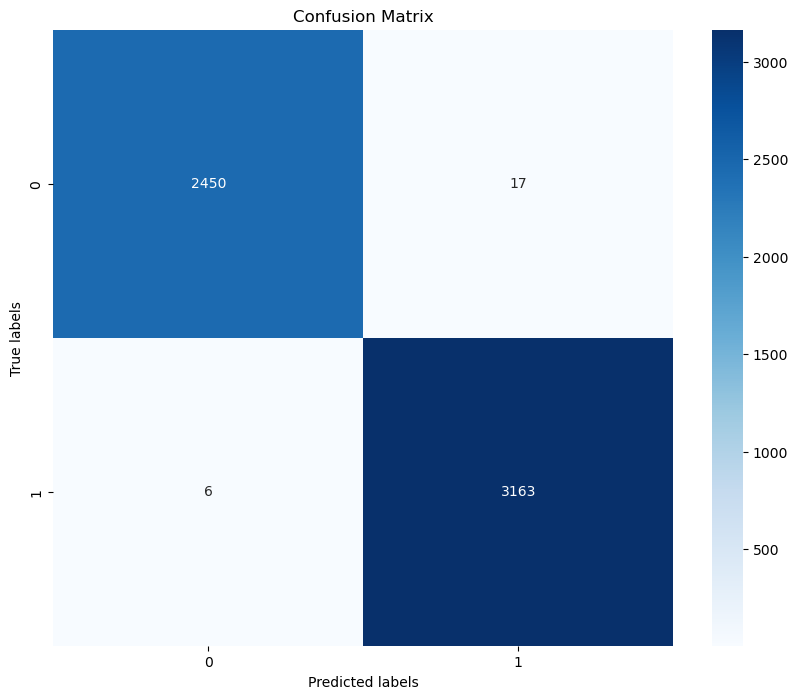

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
scaler = StandardScaler()
scale_x_test = scaler.fit_transform(x_test)
variances = scale_x_test.var(axis=0)
variance_df = pd.DataFrame(variances, columns=["Variance"])
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
#sns.heatmap(variance_df, annot=True, cmap='Accent')
#plt.title('Feature Variance')
#plt.show()
#variance_df
#x_test

In [1]:
dataframe = pd.DataFrame(x_test, columns=[f"Feature_{i}" for i in range(x_test.shape[1])])
dataframe
selected_features = ['Feature_0', 'Feature_1', 'Feature_2']  # Replace with your selected features
plt.figure(figsize=(12, 8))
sns.heatmap(dataframe[selected_features + ['Actual']].groupby(['Actual']).mean(), cmap="viridis", annot=True, fmt=".4f", linewidths=.5)
plt.title("Feature Variance Heatmap - Malicious vs. Non-Malicious Connections")
plt.show()

NameError: name 'pd' is not defined

In [12]:
sns.heatmap(dataframe, annot=True, cmap="viridis", fmt=".4f", linewidths=.5)
plt.title("Feature Variance Heatmap")
plt.show()

In [ ]:
plt.figure()

#plot clusters
ax = sns.catplot(data = attack_data,
                      x = 'duration',
                      y = 'level',
                        palette = 'colorblind',
                        alpha = 0.8,
                        s =150,
                        legend = False)

#plotting centroids
ax = sns.catplot(data = normal_data, 
                    x = 'duration',
                    y = 'level',
                    palette = 'colorblind',
                    s = 150,
                    marker = 'D',
                    ec = 'black',
                    legend = False)

Due to the amount of data in the data set, it must be clustered together. Firstly, we need to scale down the data so it fits. if I use a regularisation function, I can fit the data without causing too much overlap. 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
purenumbers.describe().round(2)
#purenumbers_scaled = scaler.fit_transform(purenumbers)
#purenumbers_scaled = pd.DataFrame(purenumbers_scaled)
#purenumbers_scaled.describe().round(2)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00,1.259730e+05,1.259730e+05,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,...,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00,125973.00
mean,287.14,4.556674e+04,1.977911e+04,0.00,0.02,0.00,0.20,0.00,0.40,0.28,...,115.65,0.52,0.08,0.15,0.03,0.28,0.28,0.12,0.12,19.50
std,2604.52,5.870331e+06,4.021269e+06,0.01,0.25,0.01,2.15,0.05,0.49,23.94,...,110.70,0.45,0.19,0.31,0.11,0.44,0.45,0.31,0.32,2.29
min,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00
50%,0.00,4.400000e+01,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,63.00,0.51,0.02,0.00,0.00,0.00,0.00,0.00,0.00,20.00
75%,0.00,2.760000e+02,5.160000e+02,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,255.00,1.00,0.07,0.06,0.02,1.00,1.00,0.00,0.00,21.00
max,42908.00,1.379964e+09,1.309937e+09,1.00,3.00,3.00,77.00,5.00,1.00,7479.00,...,255.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,21.00


In [24]:
purenumbers_scaled = scaler.fit_transform(purenumbers[['duration','level']])
purenumbers_scaled = pd.DataFrame(purenumbers_scaled, columns = ['duration', 'level'])
purenumbers_scaled.describe().round(2)

,duration,level
count,125973.00,125973.00
mean,0.00,0.00
std,1.00,1.00
min,-0.11,-8.51
25%,-0.11,-0.66
50%,-0.11,0.22
75%,-0.11,0.65
max,16.36,0.65


Now we'll look at clustering together our data

In [37]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6, n_init=25, random_state=1234)

In [38]:
km.fit(purenumbers_scaled)

KMeans(n_clusters=6, n_init=25, random_state=1234)

In [39]:
km.labels_

array([0, 2, 5, ..., 5, 0, 0], dtype=int32)

In [40]:
km.inertia_

21386.408692403384

In [41]:
pd.Series(km.labels_).value_counts().sort_index()

0    81440
1      517
2     7295
3     1794
4      996
5    33931
dtype: int64

In [42]:
km.cluster_centers_

array([[-0.09309889,  0.54985923],
       [13.34846206, -2.01620204],
       [-0.06919903, -2.04123037],
       [-0.02568025, -4.98627676],
       [ 4.92887176, -0.76196071],
       [-0.10838054, -0.56417701]])

In [43]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['duration', 'level'])
cluster_centers


,duration,level
0,-0.093099,0.549859
1,13.348462,-2.016202
2,-0.069199,-2.041230
3,-0.025680,-4.986277
4,4.928872,-0.761961
5,-0.108381,-0.564177


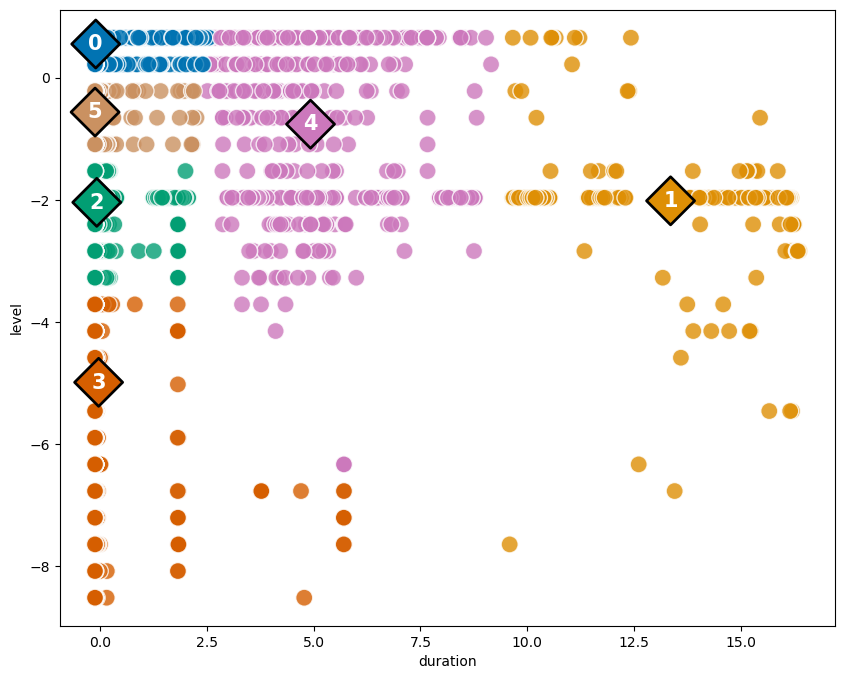

In [45]:
#setting figure size
plt.figure(figsize=(10,8))

#plot clusters
ax = sns.scatterplot (data = purenumbers_scaled,
                      x = 'duration',
                      y = 'level',
                     hue = km.labels_,
                        palette = 'colorblind',
                        alpha = 0.8,
                        s =150,
                            legend = False)

#plotting centroids
ax = sns.scatterplot(data = cluster_centers,
                    x = 'duration',
                    y = 'level',
                    hue= cluster_centers.index,
                    palette = 'colorblind',
                    s = 600,
                    marker = 'D',
                    ec = 'black',
                    legend = False)

#add centroid labels
for i in range(len(cluster_centers)):
        plt.text(x = cluster_centers.duration[i],
        y = cluster_centers.level[i],
        s = i,
        horizontalalignment='center',
        verticalalignment='center',
        size = 15,
        weight = 'bold',
        color = 'white')

In order to adjust the number of clusters we're using, we can check using the following algorithms

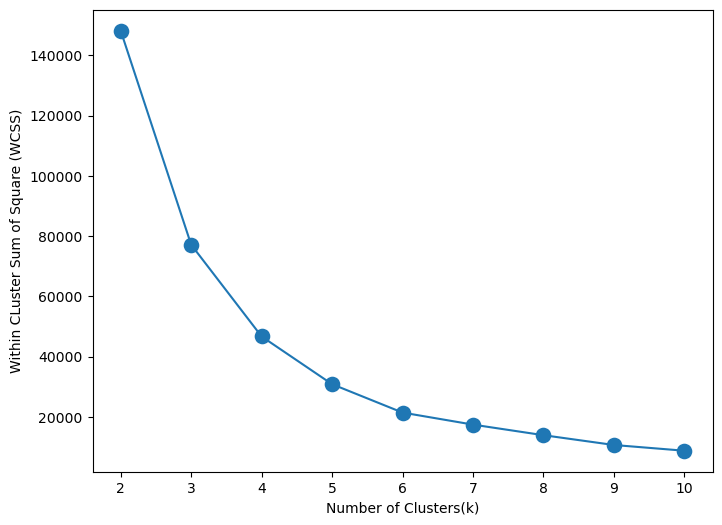

In [34]:
# THE WITHIN CLUSTER SUM OF SQUARES (WCSS)
wcss=[]
for k in range(2,11):
    km = KMeans(n_clusters = k, n_init =25, random_state =1234)
    km.fit(purenumbers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8,6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters(k)',
    ylabel = 'Within CLuster Sum of Square (WCSS)')

## Average Silhouette Score

In [35]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    #insert scaled data to check
    km.fit(purenumbers_scaled)
    silhouette.append(silhouette_score(purenumbers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

KeyboardInterrupt: 

## Calinski Harabasz Score

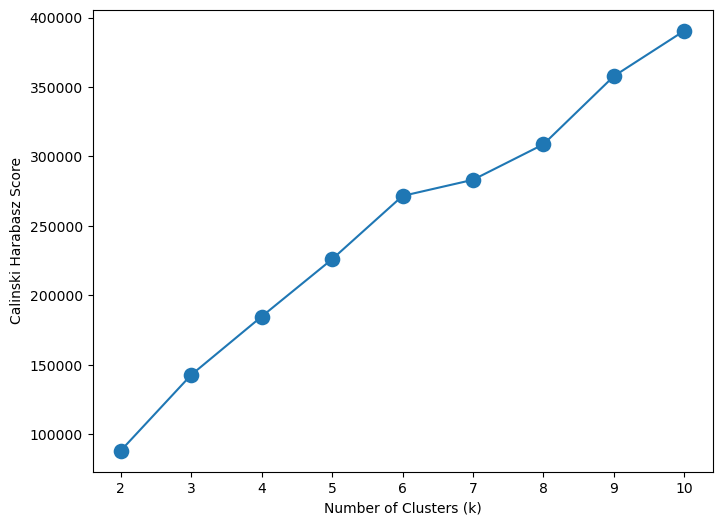

In [36]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    #insert scaled data to check
    km.fit(purenumbers_scaled)
    calinski.append(calinski_harabasz_score(purenumbers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')